from Jin 3-Oct

* ~drop satellite image slide~
* get to the the 188 cases fast
* words in notebook are good
* read from the notebook as if it were a script
* monotonic scrolling forward (no back)



# TwoSix Armory with ART Increment 2 Demo


Here we explore how the archetypal Test and Evaluation (T&E) engineer, Jay, may
use Armory to answer important questions about the performance of various models
in the face of adversarial attack.

In this example, Jay applies a standard Projected Gradient Attack (PGD) imported
from the IBM Adversarial Robustness Toolbox (ART) to three models trained on the
EuroSAT dataset. The models are imported from HuggingFace's model hub. Jay then
prepares an set of Armory evaluations to compare the performance of the models.

![what-is-armory-slide.png](support/what-is-armory-slide.png)


## Motivation


this slide needs to be replaced with a user-dataflow model that created
the data under analysis.

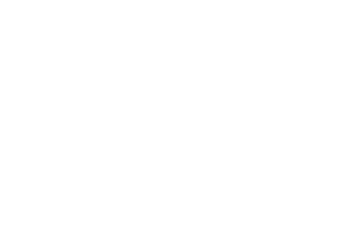

Jay is trying to do cross model comparisons and it is an inherent feature of the
persona. Armory is allowing Jay to understand the relative performance of models in the face of adversarial attack under varying parameters.

This activity is interpretive and exploratory. Jay is not trying to make a
decision, but rather understand the performance of the models under attack.

IBM demonstrated auto-attack, Armory suite provides tools for meta-analysis of
pre-computed adversarial evaluation results.

## Meta-Analysis of pre-computed Adversarial Evaluations

This notebook shows cross-model comparisons as afforded by armory-libarary and armory suite. Thus, no Armory/ART evaluations are contained here, but rather the logged parameters and metrics of over 180+ separate Armory evaluations are analyzed here.

The ML test and evaluation performer, Jay, will be looking to answer two questions about adversarial evaluations:

1. What are the relevant differences in categorical accuracy of three different models?
2. What are the relative and absolute costs of performing an adversarial attacks against the three models?

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df = pd.read_csv("eurosat_model_eval_09102023.csv")

## Linear Regression


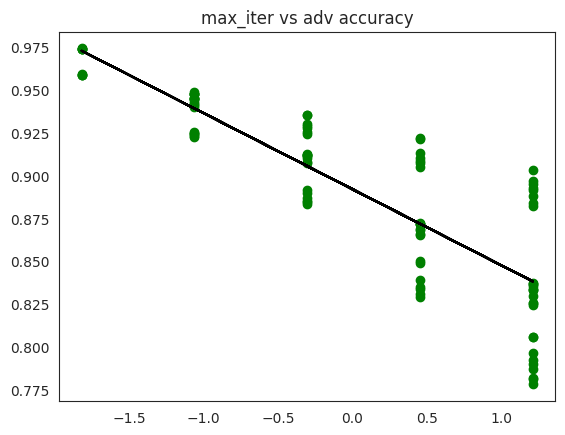

0.7254045695579221

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


features = ['ProjectedGradientDescent.eps', 'ProjectedGradientDescent.eps_step','ProjectedGradientDescent.max_iter']
x = df.loc[:, features].values
y = df.loc[:,['adversarial_mean_categorical_accuracy']].values
x = StandardScaler().fit_transform(x)


model1 = LinearRegression()
model1.fit(x[:,2].reshape(-1, 1), y)
plt.scatter(x[:,2].reshape(-1, 1), y.reshape(-1, 1),color='g')
plt.plot(x[:,2], model1.predict(x[:,2].reshape(-1, 1)),color='k')
plt.title('max_iter vs adv accuracy')
plt.show()
r2_score(y, model1.predict(x[:,2].reshape(-1, 1)),multioutput='variance_weighted')


This analysis shows that the categorical accuracy of the three models is highly correlated. This is not surprising, as all three models are trained on the same dataset. The linear regression shows a strong correlation between adversarial iterations and decreasing performance. Also, as the number of adversarial iterations increases, the adversarial accuracy between the models diverges into a tri-modal distribution.

Jay looks at this and concludes that the models differ in their responses so performs another analysis to understand the divergence. 

### Describing the Three Modes


![white card.png](support/white-card.png)

This is a white card for the three modes of the adversarial accuracy distribution.

This analysis shows that under

* a specific attack (PGD)
* with a constant epsilon attenuation factor
* across three distinct models

that there are real differences in the adversarial accuracy of the models. The adversarial accuracy of the models is not the same, and the models are not equally robust to the attack.

## Suggested further analysis

There is an inherent tradeoff between attack iterations and computational cost of the
attack. Seeing that the three models differ more widely the higher the number of iteration
goes, Jay can gain insight about the feasibility of mounting the attack for high and 
higher numbers of iterations.

Armory also provides computational cost metrics, so as Jay elaborates the iterations
by precision measures, Armory can also read out the computational cost of the attack
in MFLOPS and seconds. This provides real world insight into the feasibility of mounting
the attack at an arbitaraily high number of iterations.

# Conclusion
Now Jay, after running these analyses, can take away …